# Exercise

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wrangle import wrangle_zillow, scale_data

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire 

train, val, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
898710,5.0,3.0,3349.0,208996.0,1964.0,2815.98,6037.0
951392,4.0,3.0,1985.0,259657.0,1977.0,3743.23,6037.0
1847439,3.0,1.0,1616.0,28940.0,1920.0,829.60,6037.0
706503,4.0,2.5,2028.0,87633.0,1972.0,1321.00,6111.0
461225,2.0,2.0,1138.0,46382.0,1958.0,583.19,6037.0


In [4]:
train_scaled, val_scaled, test_scaled = scale_data(train, val, test)

In [5]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
898710,1.000000,0.666667,0.921552,208996.0,1964.0,0.229151,6037.0
951392,0.666667,0.666667,0.546105,259657.0,1977.0,0.305050,6037.0
1847439,0.333333,0.000000,0.444536,28940.0,1920.0,0.066557,6037.0
706503,0.666667,0.500000,0.557941,87633.0,1972.0,0.106780,6111.0
461225,0.000000,0.333333,0.312964,46382.0,1958.0,0.046388,6037.0


In [22]:
x_train = train_scaled.drop(columns='tax_value')
y_train = pd.DataFrame(train_scaled['tax_value'])

x_val = val_scaled.drop(columns='tax_value')
y_val = pd.DataFrame(val_scaled['tax_value'])

x_test = test_scaled.drop(columns='tax_value')
y_test = test_scaled['tax_value']

In [16]:
x_train
y_train


,tax_value
898710,208996.0
951392,259657.0
1847439,28940.0
706503,87633.0
461225,46382.0
...,...
1025016,62992.0
1734384,540464.0
1121629,513043.0
533946,157328.0


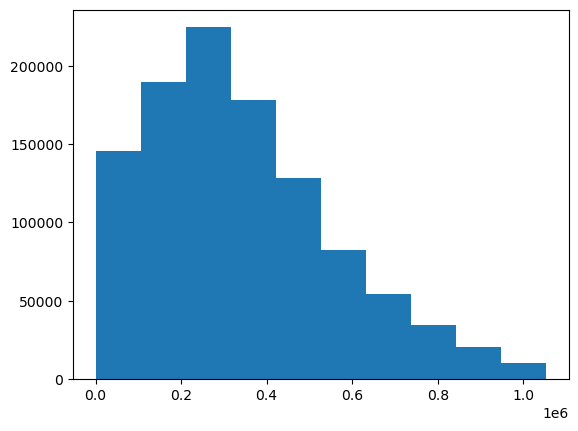

In [17]:
plt.hist(y_train)
plt.show()

In [23]:
# 1. Predict G3_pred_mean
tax_value_pred_mean = y_train.tax_value.mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_val['tax_value_pred_mean'] = tax_value_pred_mean

In [24]:
y_train

,tax_value,tax_value_pred_mean
898710,208996.0,341819.929829
951392,259657.0,341819.929829
1847439,28940.0,341819.929829
706503,87633.0,341819.929829
461225,46382.0,341819.929829
...,...,...
1025016,62992.0,341819.929829
1734384,540464.0,341819.929829
1121629,513043.0,341819.929829
533946,157328.0,341819.929829


In [26]:
# 3. RMSE of tax_value_pred_mean
rmse_train_mu = mean_squared_error(y_train.tax_value,
                                y_train.tax_value_pred_mean) ** .5

rmse_validate_mu = mean_squared_error(y_val.tax_value, y_val.tax_value_pred_mean) ** (0.5)

print(f"""RMSE using Mean
Train/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 215510.13 
Validate/Out-of-Sample: 215565.99


In [63]:
metric_df = pd.DataFrame(data=[
    {'model': 'mean_baseline',
     'RMSE_train': rmse_train_mu,
     'RMSE_validate': rmse_validate_mu,
     'R2_validate': explained_variance_score(y_val.tax_value,
                                             y_val.tax_value_pred_mean)
    }
]
)

In [28]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,215510.133112,215565.990935,0.0


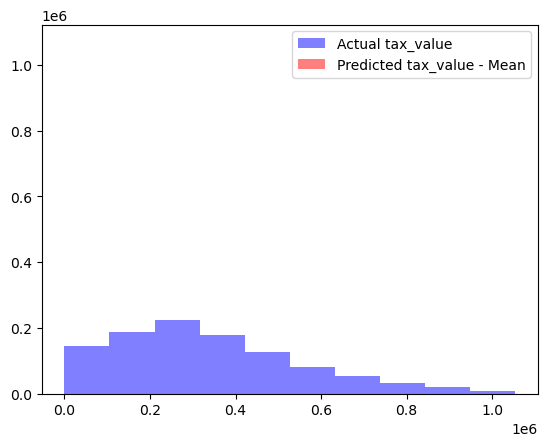

In [36]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual tax_value")
plt.hist(y_train.tax_value_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted tax_value - Mean")


plt.legend()
plt.show()

In [64]:
# MAKE THE THING: create the model object
lm = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = lm.fit(x_train, y_train.tax_value)

#2. USE THE THING: make a prediction
y_train['tax_value_pred_lm'] = lm.predict(x_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

In [65]:
#4. REPEAT STEPS 2-3

# predict validate
y_val['tax_value_pred_lm'] = lm.predict(x_val)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_val.tax_value, y_val.tax_value_pred_lm)**(1/2)


print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  50358.65578495788 
Validation/Out-of-Sample: 49519.31637747361


In [66]:
metric_df = metric_df.append(
    {'model': 'OLS Regressor',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_val.tax_value,
                                             y_val.tax_value_pred_lm)
    }, ignore_index=True)

In [67]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,215510.133112,215565.990935,0.000000
1,OLS Regressor,50358.655785,49519.316377,0.947231


In [48]:
OLSmodel.coef_

array([-1.16661274e+04,  6.16776167e+03,  3.72529284e+04, -3.07118524e+02,
        1.03216474e+06,  7.71165991e+02])

In [49]:
OLSmodel.intercept_

-4091934.5543146417

In [68]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=0.01)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(x_train, y_train.tax_value)

#2. USE THE THING: make a prediction
y_train['tax_value_pred_lars'] = lars.predict(x_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_val['tax_value_pred_lars'] = lars.predict(x_val)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_val.tax_value, y_val.tax_value_pred_lars) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 50358.667945721994, 
Validation/Out-of-Sample:  49519.20713149928
Difference:  -839.4608142227153


In [69]:
metric_df = metric_df.append(
    {'model': 'Lars lasso',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_val.tax_value,
                                             y_val.tax_value_pred_lars)
    }, ignore_index=True)

In [70]:
metric_df


,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,215510.133112,215565.990935,0.000000
1,OLS Regressor,50358.655785,49519.316377,0.947231
2,Lars lasso,50358.667946,49519.207131,0.947232
